# Logistic Regression / Classification

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Root Finding

min: 0.739085133214985
min brentq: 0.7390851332151607


(-5.0, 5.0)

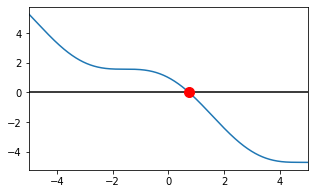

In [2]:
import scipy.optimize as opt

def f(x):
    return np.cos(x) - x

x = np.linspace(-5, 5, 1000)
y = f(x)

x_min = opt.bisect(f, -5, 5)
x_min_brentq = opt.brentq(f, -5, 5) # hydrid method (good default)

print(f"min: {x_min}")
print(f"min brentq: {x_min_brentq}")

fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.axhline(0, color='k')
ax.plot(x, y)
# The underscore plugs from the previous input
ax.scatter([x_min], [0], c='r', s=100, zorder=10)
ax.set_xlim(-5, 5)

## Minimization

(-20.0, 20.0)

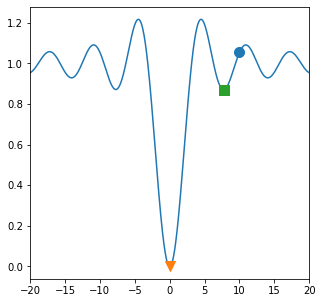

In [3]:
import scipy.optimize as opt

def f(x):
    return 1 - np.sin(x) / x

x = np.linspace(-20., 20., 1000)
y = f(x)

x0 = 10
xmin = opt.minimize(f, x0).x
# We use 1000 iterations.
xmin_bas = opt.basinhopping(f, x0, 1000).x  # better with local minimum 

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(x, y)
ax.scatter(x0, f(x0), marker='o', s=100)
ax.scatter(xmin_bas, f(xmin_bas), marker='v', s=100, zorder=20)
ax.scatter(xmin, f(xmin), marker='s', s=100, zorder=20)
ax.set_xlim(-20, 20)

In [4]:
df = sns.load_dataset('titanic')

drop_cols = ['survived', 'alive', 'class', 'deck', 'embark_town','adult_male']
cat_cols = ['sex', 'embarked', 'who', 'alone']
num_cols = ['age', 'fare']

df = df.dropna(axis=0, subset=num_cols)

y = df.survived
X = df.drop(columns=drop_cols)

for c in cat_cols:
    X = X.join(pd.get_dummies(df[c], drop_first=True, prefix=c)).drop(columns=c)

for c in num_cols:
    X[c + '2'] = X[c] ** 2
    #X[c + '3'] = X[c] ** 3

X.head(5)

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,who_man,who_woman,alone_True,age2,fare2
0,3,22.0,1,0,7.2500,1,0,1,1,0,0,484.0,52.562500
1,1,38.0,1,0,71.2833,0,0,0,0,1,0,1444.0,5081.308859
2,3,26.0,0,0,7.9250,0,0,1,0,1,1,676.0,62.805625
3,1,35.0,1,0,53.1000,0,0,1,0,1,0,1225.0,2819.610000
4,3,35.0,0,0,8.0500,1,0,1,1,0,1,1225.0,64.802500


# Logit (statsmodels)

In [5]:
est = sm.Logit(y, sm.add_constant(X)).fit(cov_type='HC2')
est.summary()

Optimization terminated successfully.
         Current function value: 0.416151
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      700
Method:                           MLE   Df Model:                           13
Date:                Thu, 11 Feb 2021   Pseudo R-squ.:                  0.3839
Time:                        15:26:41   Log-Likelihood:                -297.13
converged:                       True   LL-Null:                       -482.26
Covariance Type:                  HC2   LLR p-value:                 4.224e-71
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6240      0.868      6.477      0.000       3.922       7.326
pclass        -1.2156      0.229     -5.306      0.000      -1.665      -0.767
age           -0.0235      0.042     -0.557      0.578      -0.106       0.059
sibsp         -0.5940      0.150     -3.968      0.000      -0.887      -0.301
parch         -0.2711      0.143     -1.896      0.058      -0.551       0.009
fare          -0.0035      0.007     -0.485      0.628      -0.018       0.011
sex_male       0.0420      0.499      0.084      0.933      -0.937       1.021
embarked_Q    -0.9227      0.587     -1.571      0.116      -2.074       0.229
embarked_S    -0.3854      0.303     -1.273      0.203      -0.979       0.208
who_man       -3.0082      0.724     -4.154      0.000      -4.427      -1.589
who_woman      0.1537      0.667      0.230      0.818      -1.153       1.461
alone_True    -0.4096      0.309     -1.325      0.185      -1.016       0.196
age2       -2.399e-05      0.001     -0.044      0.965      -0.001       0.001
fare2       1.566e-05   1.51e-05      1.038      0.299   -1.39e-05    4.52e-05
==============================================================================
"""

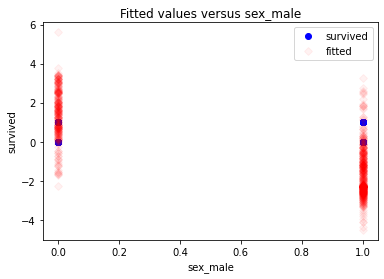

In [9]:
sm.graphics.plot_fit(est, 'sex_male', vlines=False, alpha=0.05).show()

# Logistic Regression (sklearn)

[[103  22]
 [ 30  60]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       125
           1       0.73      0.67      0.70        90

    accuracy                           0.76       215
   macro avg       0.75      0.75      0.75       215
weighted avg       0.76      0.76      0.76       215



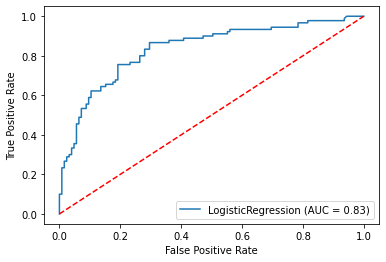

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=400, random_state=42).fit(X_train, y_train)
y_pred = logreg.predict(X_test)
 
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

metrics.plot_roc_curve(logreg, X_test, y_test);
plt.plot([0, 1], [0, 1],'r--');

# Interpretation 

1. **Confusion Matrix** is a matrix of true/false positive/negative predictions. You want more entries on the main diagonal, and fewer off the main diagonal.

2. The **precision** is the ratio `tp / (tp + fp)` where tp is the number of true positives and fp the number of false positives. 

The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

3. The **recall** is the ratio `tp / (tp + fn)` where tp is the number of true positives and fn the number of false negatives. 

The recall is intuitively the ability of the classifier to find all the positive samples.

4. The **F-beta** score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

5. The **support** is the number of occurrences of each class in `y_true`.

# ROC Curve

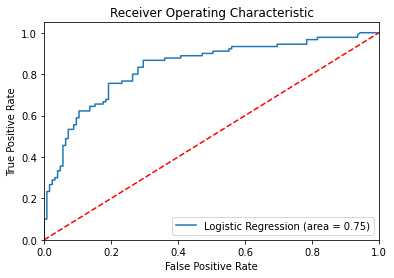

In [11]:
logit_roc_auc = metrics.roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = metrics.roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Exotic distributions

In [ ]:
#sm.Poisson(y, sm.add_constant(X)).fit().summary()              # assume variance is equal to the mean
#sm.NegativeBinomial(y, sm.add_constant(X)).fit().summary()     # variance value free from the mean (generalized Poisson)
#sm.ZeroInflatedPoisson(y, sm.add_constant(X)).fit().summary()  # large amount of zero values
#sm.QuantReg(y, sm.add_constant(X)).fit(q=0.5)).summary()       # robust to outliers 

# Two Stage modeling (AKA Hurdle Models)

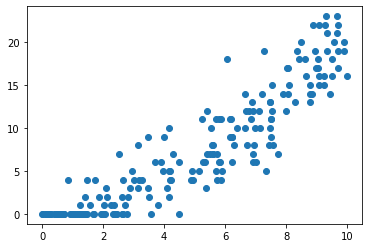

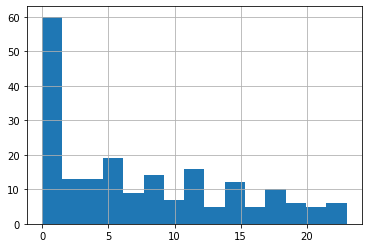

In [12]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(200)
y = np.floor(2.5 * x - 5.5 + (3 * rng.randn(200)))
# clip y to non-negative values
y[y < 0] = 0.
plt.scatter(x, y)
plt.show()
pd.Series(y).hist(bins=15)

Optimization terminated successfully.
         Current function value: 0.192961
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     610.3
Date:                Thu, 11 Feb 2021   Prob (F-statistic):           3.75e-85
Time:                        15:28:41   Log-Likelihood:                -469.28
No. Observations:                 200   AIC:                             944.6
Df Residuals:                     197   BIC:                             954.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1027      0.407     -2.712      0.007      -1.905      -0.301
x              2.6545      0.118     22.401      0.000       2.421       2.888
stage1        -6.0086      0.986     -6.093      0.000      -7.953      -4.064
==============================================================================
Omnibus:                        8.995   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               10.459
Skew:                           0.365   Prob(JB):                      0.00536
Kurtosis:                       3.850   Cond. No.                         33.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

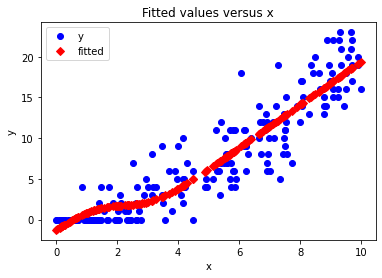

In [13]:
# Stage 1
est1 = sm.Logit((y > 0).astype(int), sm.add_constant(x)).fit()
# Prep Stage 2
X = pd.DataFrame(sm.add_constant(x))
X['stage1'] = est1.predict(X)
X.columns = ['const', 'x', 'stage1']
# Stage 2
est2 = sm.OLS(y, X).fit()
sm.graphics.plot_fit(est2, 1, vlines=False)
est2.summary()

# Survival model

In [14]:
from lifelines.datasets import load_waltons
df = load_waltons() # returns a Pandas DataFrame
df.sample(5)

,T,E,group
119,56.0,1,control
103,48.0,1,control
132,69.0,1,control
126,63.0,1,control
75,68.0,1,control


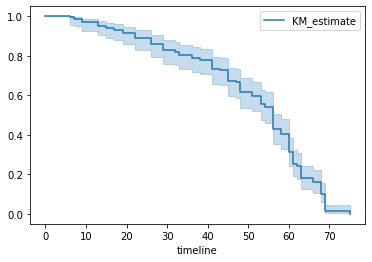

In [15]:
from lifelines import KaplanMeierFitter

T = df['T']
E = df['E']

kmf = KaplanMeierFitter()
kmf.fit(T, E)
kmf.plot_survival_function()

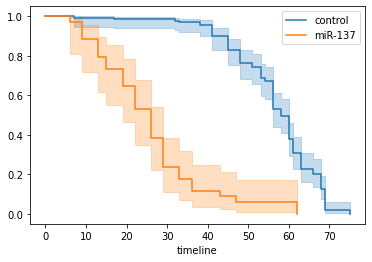

In [16]:
groups = df['group']
ix = (groups == 'miR-137')
kmf.fit(T[~ix], E[~ix], label='control')
ax = kmf.plot_survival_function()
kmf.fit(T[ix], E[ix], label='miR-137')
ax = kmf.plot_survival_function(ax=ax)

### Survival Regression in lifelines

<lifelines.CoxPHFitter: fitted with 200 total observations, 11 right-censored observations>
             duration col = 'T'
                event col = 'E'
      baseline estimation = breslow
   number of observations = 200
number of events observed = 189
   partial log-likelihood = -807.62
         time fit was run = 2021-02-11 20:28:53 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
var1        0.22       1.25       0.07             0.08             0.37                 1.08                 1.44
var2        0.05       1.05       0.08            -0.11             0.21                 0.89                 1.24
var3        0.22       1.24       0.08             0.07             0.37                 1.07                 1.44

             z      p   -log2(p)
covariate                       
var1      2.99 <0.005       8.49
var2      0.61   0.54       0.89
var3      2.88 <0.005       7.97
---
Concordance = 0.58
Partial AIC = 1621.24
log-likelihood ratio test = 15.54 on 3 df
-log2(p) of ll-ratio test = 9.47

None


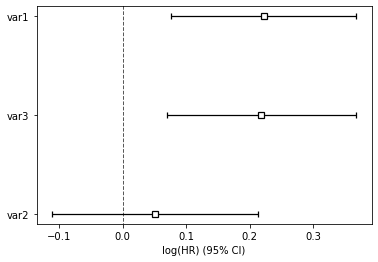

In [17]:
from lifelines.datasets import load_regression_dataset
df = load_regression_dataset()

from lifelines import CoxPHFitter

# Using Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(df, 'T', event_col='E')
print(cph.print_summary())
cph.plot()

<lifelines.WeibullAFTFitter: fitted with 200 total observations, 11 right-censored observations>
             duration col = 'T'
                event col = 'E'
   number of observations = 200
number of events observed = 189
           log-likelihood = -504.48
         time fit was run = 2021-02-11 20:29:00 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                         
lambda_ var1       -0.08       0.92       0.02            -0.13            -0.04                 0.88                 0.97
        var2       -0.02       0.98       0.03            -0.07             0.04                 0.93                 1.04
        var3       -0.08       0.92       0.02            -0.13            -0.03                 0.88                 0.97
        Intercept   2.53      12.57       0.05             2.43             2.63                11.41                13.85
rho_    Intercept   1.09       2.98       0.05             0.99             1.20                 2.68                 3.32

                      z      p   -log2(p)
param   covariate                        
lambda_ var1      -3.45 <0.005      10.78
        var2      -0.56   0.57       0.80
        var3      -3.33 <0.005      10.15
        Intercept 51.12 <0.005        inf
rho_    Intercept 20.12 <0.005     296.66
---
Concordance = 0.58
AIC = 1018.97
log-likelihood ratio test = 19.73 on 3 df
-log2(p) of ll-ratio test = 12.34

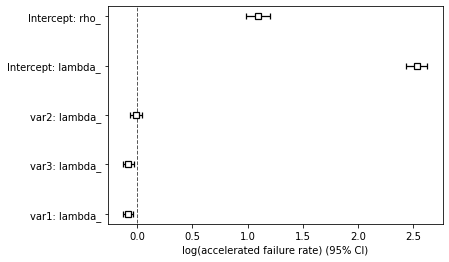

In [18]:
from lifelines import WeibullAFTFitter

wft = WeibullAFTFitter()
wft.fit(df, 'T', event_col='E')
wft.print_summary()

wft.plot()